## 1. Problem Statement
This project aims to understand how student performance (test scores) is influenced by various factors, including Gender, Ethnicity, Parental Level of Education, Lunch, and Test Preparation Course.

## Dataset information

Gender: Sex of students → (Male/Female) 👨
Race/Ethnicity: Ethnicity of students → (Group A, B, C, D, E) 🏹
Parental Level of Education: Parents' final education → (Bachelor's degree, Some college, Master's degree, Associate's degree, High school) 📚
Lunch: Having lunch before test → (Standard or Free/reduced) 🍟
Test Preparation Course: Complete or not complete before test 📝
Math Score €Calculator;
Reading Score 📚
Writing Score

In [1]:
#importing necessary library 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading a datset into dataframe
df=pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3 Data preprocessing

###  3.1 missing value

In [3]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 3.2 check duplicate value

In [4]:
df.duplicated().sum()

0

### 3.3 check data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 checking unique value

In [6]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 check statistics of the data

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


from above we can infere that,

->there is no hardly any outlier in the dataset.\
->average score of the students is around 69% which is an average level performance.


### 3.7. Exploring data

In [8]:
print(f'Categories in gender: ',end=" ")
print(df['gender'].unique())

print(f'Categories label in race/ethnicity: ',end=" ")
print(df['race/ethnicity'].unique())

print(f'Categories label in parental level of education: ',end=" ")
print(df['parental level of education'].unique())

print(f'Categories label in lunch: ',end=" ")
print(df['lunch'].unique())

print(f'Categories label in test preparation course: ',end=" ")
print(df['test preparation course'].unique())

Categories in gender:  ['female' 'male']
Categories label in race/ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories label in parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories label in lunch:  ['standard' 'free/reduced']
Categories label in test preparation course:  ['none' 'completed']


In [9]:
# numerical and categorical feature columns
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print(f'numerical feature: {len(numeric_features)}')
print(f'categorical feature: {len(categorical_features)}')

numerical feature: 3
categorical feature: 5


### 3.8 adding columns for total and average

In [10]:
df['total']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [11]:
reading_full=df[df['reading score']==100].shape[0]
writing_full=df[df['writing score']==100].shape[0]
math_full=df[df['math score']==100]['average'].shape[0]

print(f'No of student with full marks in math: {math_full}')
print(f'No of student with full marks in writing: {writing_full}')
print(f'No of student with full marks in reading: {reading_full}')

No of student with full marks in math: 7
No of student with full marks in writing: 14
No of student with full marks in reading: 17


In [12]:
reading_full=df[df['reading score']<=20].shape[0]
writing_full=df[df['writing score']<=20].shape[0]
math_full=df[df['math score']<=20]['average'].shape[0]

print(f'No of student with got less then 20 in math: {math_full}')
print(f'No of student with got less then 20 in writing: {writing_full}')
print(f'No of student with got less then 20 in reading: {reading_full}')

No of student with got less then 20 in math: 4
No of student with got less then 20 in writing: 3
No of student with got less then 20 in reading: 1


->student perform worst in math as compare to other subject

## EDA 

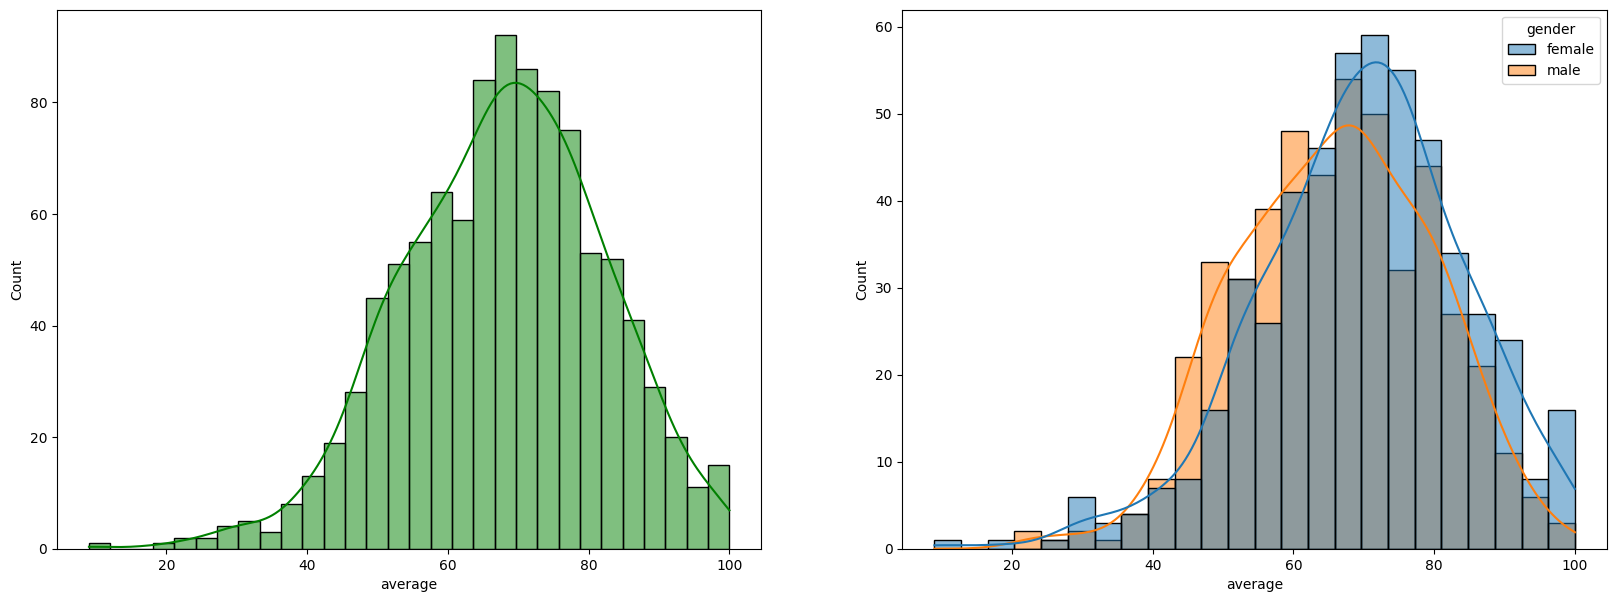

In [17]:
# histogram and kde
fig,ax=plt.subplots(1,2,figsize=(20,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

->female are performing well than male student

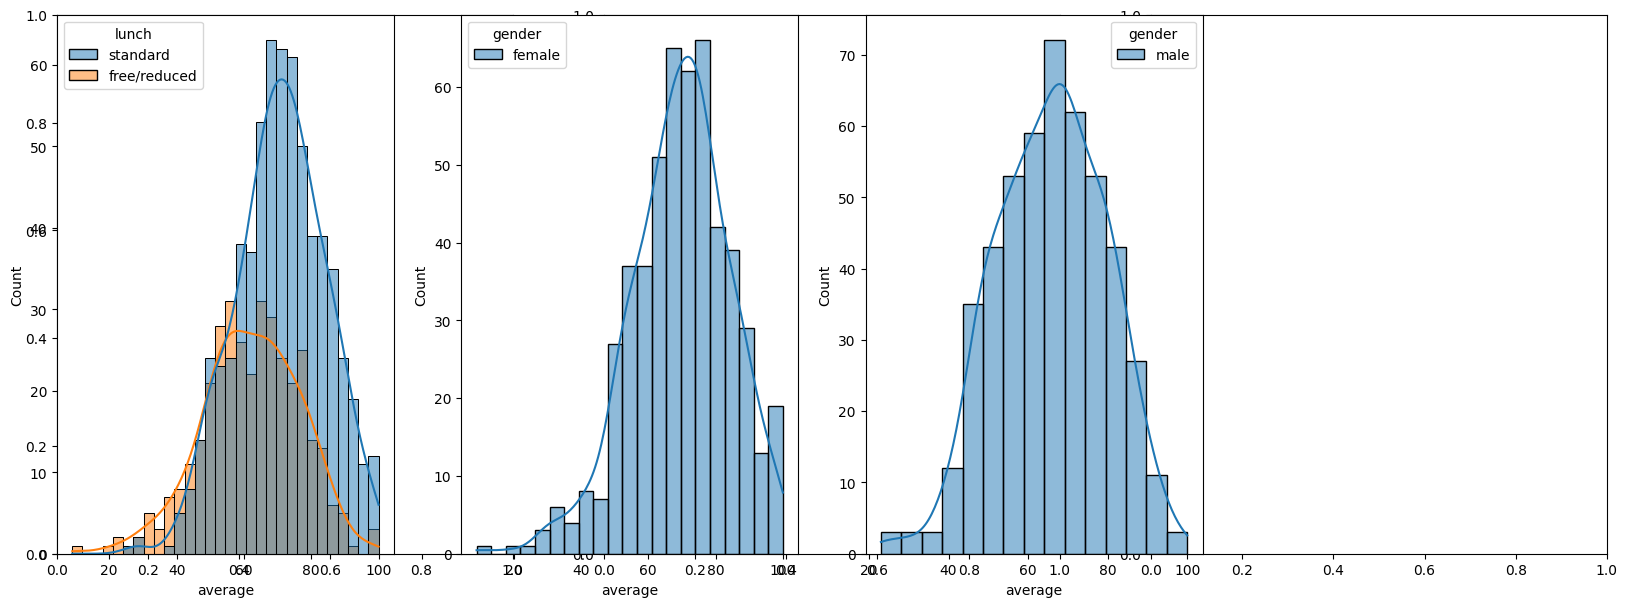

In [18]:
fig,ax=plt.subplots(1,3,figsize=(20,7))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='gender')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='gender')
plt.show()

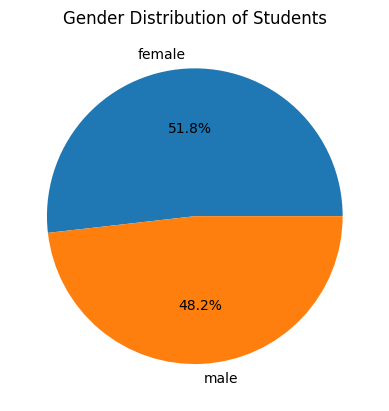

In [19]:
#gender distribution of gender
gender_counts = df['gender'].value_counts()  # Get counts of each gender category

# Plotting the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Students')
plt.show()

Gender ratio is maintain properly.

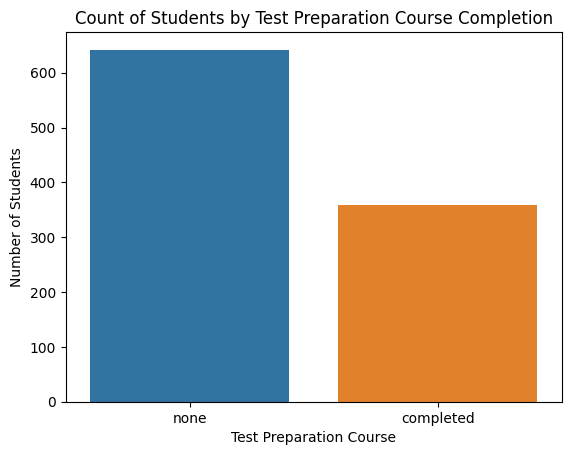

In [21]:
sns.countplot(data=df, x='test preparation course')
plt.title('Count of Students by Test Preparation Course Completion')
plt.xlabel('Test Preparation Course')
plt.ylabel('Number of Students')
plt.show()

Text(0, 0.5, 'Math Score')

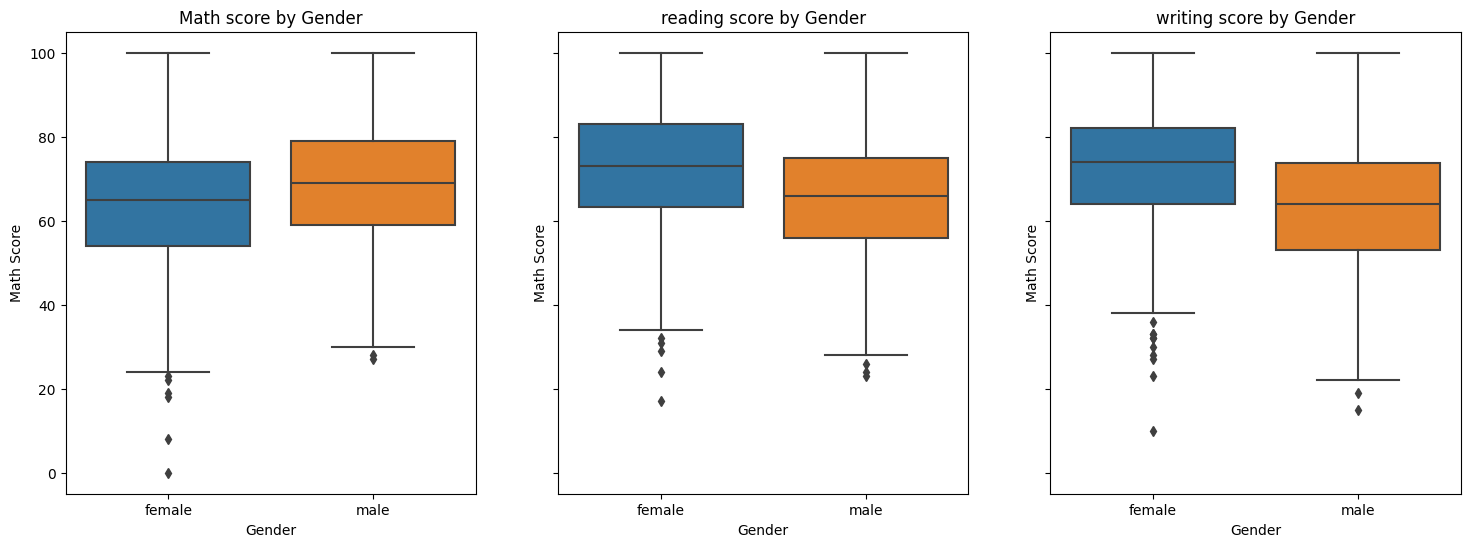

In [24]:
# gender vs score
fig,axes=plt.subplots(1,3,figsize=(18,6),sharey=True)

sns.boxplot(data=df,x='gender',y='math score',ax=axes[0])
axes[0].set_title('Math score by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Math Score')

sns.boxplot(data=df,x='gender',y='reading score',ax=axes[1])
axes[1].set_title('reading score by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Math Score')

sns.boxplot(data=df,x='gender',y='writing score',ax=axes[2])
axes[2].set_title('writing score by Gender')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Math Score')



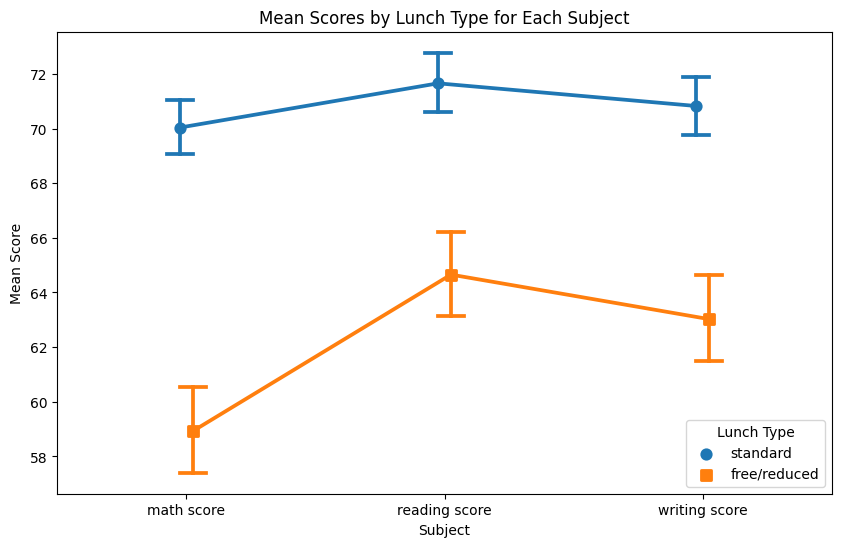

In [25]:
df_melted = df.melt(id_vars=['lunch'], value_vars=['math score', 'reading score', 'writing score'],
                    var_name='subject', value_name='score')

# Plotting the point plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_melted, x='subject', y='score', hue='lunch', dodge=True, markers=['o', 's'], capsize=.1)
plt.title('Mean Scores by Lunch Type for Each Subject')
plt.xlabel('Subject')
plt.ylabel('Mean Score')
plt.legend(title='Lunch Type')
plt.show()

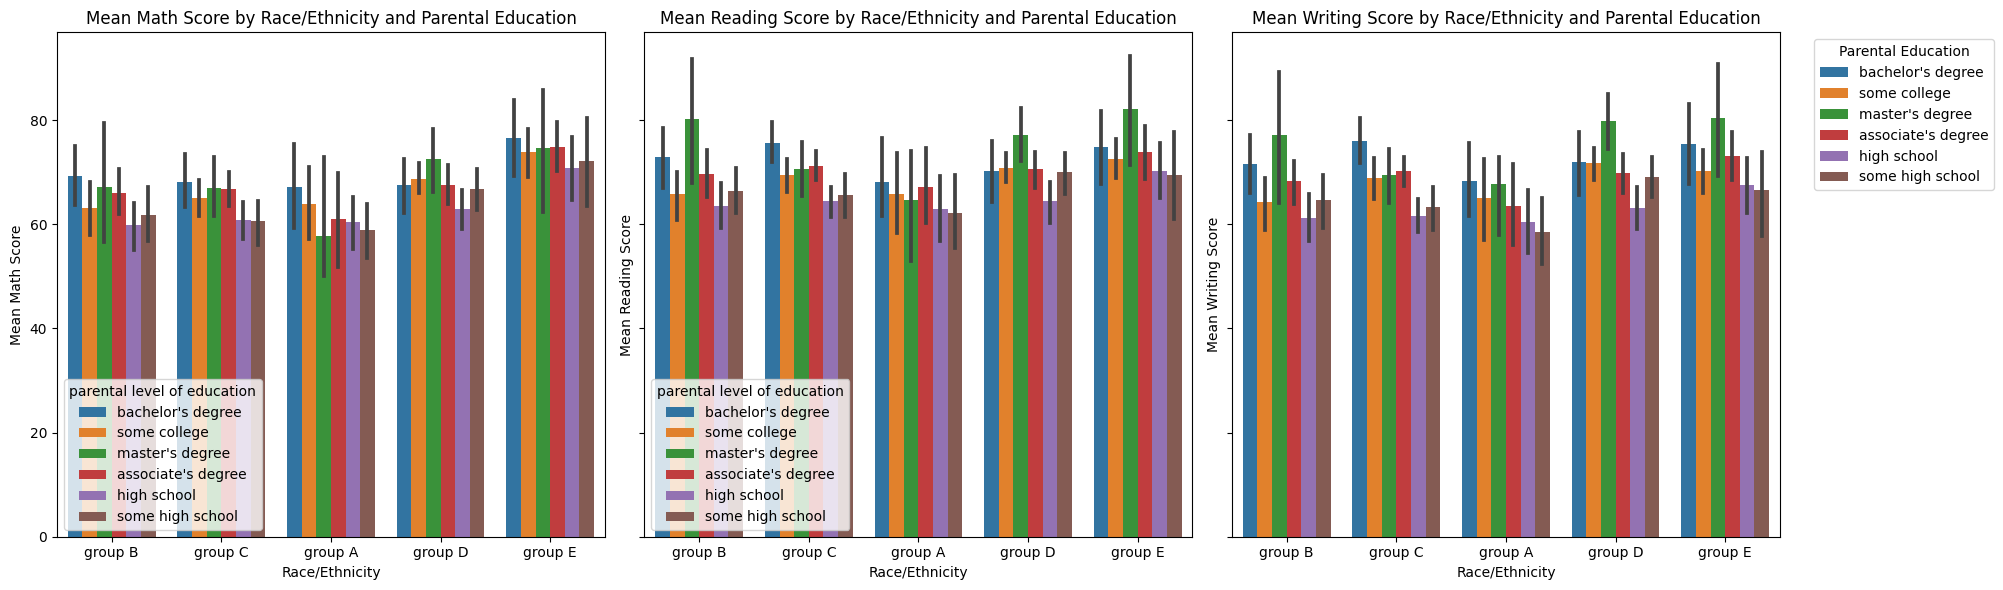

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Math Score by Race/Ethnicity and Parental Education
sns.barplot(data=df, x='race/ethnicity', y='math score', hue='parental level of education', ax=axes[0])
axes[0].set_title('Mean Math Score by Race/Ethnicity and Parental Education')
axes[0].set_xlabel('Race/Ethnicity')
axes[0].set_ylabel('Mean Math Score')

# Reading Score by Race/Ethnicity and Parental Education
sns.barplot(data=df, x='race/ethnicity', y='reading score', hue='parental level of education', ax=axes[1])
axes[1].set_title('Mean Reading Score by Race/Ethnicity and Parental Education')
axes[1].set_xlabel('Race/Ethnicity')
axes[1].set_ylabel('Mean Reading Score')

# Writing Score by Race/Ethnicity and Parental Education
sns.barplot(data=df, x='race/ethnicity', y='writing score', hue='parental level of education', ax=axes[2])
axes[2].set_title('Mean Writing Score by Race/Ethnicity and Parental Education')
axes[2].set_xlabel('Race/Ethnicity')
axes[2].set_ylabel('Mean Writing Score')

plt.tight_layout()
plt.legend(title='Parental Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()